In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import Functions.PCA as pca
import Functions.data_load as dat
import Functions.visualization as vis
import Functions.average_img as avg

In [2]:
#load data
train_array, test_array = dat.load_data()

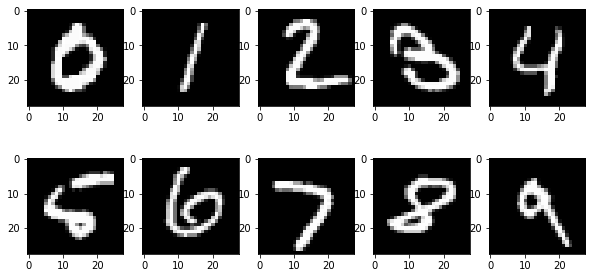

In [3]:
vis.ten_digits(test_array)

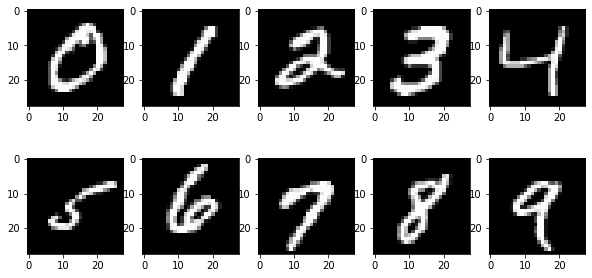

In [4]:
vis.ten_digits(train_array)

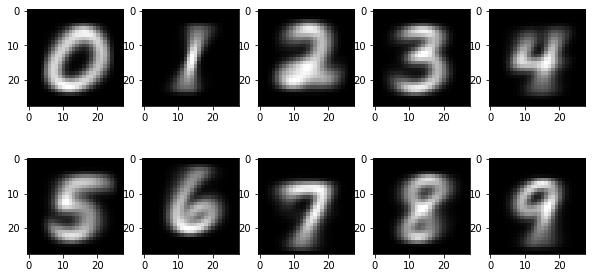

In [5]:
avg.digits(train_array)

**PCA**

In [6]:
z_array, z_img = pca.z_transformation(train_array[:,1:], test_array[5,1:])
reduced_set, reduced_img = pca.PCA(z_array, z_img, num_components=30)

In [9]:
PCA_img =pca.image_only(z_img, pca.create_sorted_eigenvec(z_array, num_components=30))

In [10]:
PCA_set = pca.set_only(z_array, pca.create_sorted_eigenvec(z_array, num_components=30))

In [57]:
def visualize_2d(reduced_dataset, i=0, j=1):
    """
    scatterplot of principal images based on principal components

    :param reduced_dataset: dataset with PCs as features
    """
    pca_df = pd.DataFrame(data = reduced_dataset[:, i], columns = [f'PC{i}', f'PC{j}'])
    pca_df = pd.concat([pca_df, pd.DataFrame(train_array[:, 0])], axis = 1)
    #pca_df = pd.DataFrame(data = {f'{i}':reduced_dataset[:, i], f'{j}':reduced_dataset[:, j]}, index=train_array[:, 0])
    plt.figure(figsize = (8,8))
    #return pca_df
    sb.scatterplot(data = pca_df, x = f'PC{i}', y = f'PC{j}', hue = train_array[:, 0] ,s = 30, palette = 'icefire', legend='full')

In [58]:
df = visualize_2d(PCA_set)


ValueError: Shape of passed values is (59999, 1), indices imply (59999, 2)